In [1]:
import numpy as np

np.version.full_version

'1.26.4'

In [2]:
import matplotlib.pyplot as plt
import tensorflow as tf

%matplotlib inline

In [3]:
mnist = tf.keras.datasets.mnist

(train_images, y_train), (x_test, y_test) = mnist.load_data()
train_images, x_test = train_images / 255.0, x_test /255.0

In [4]:
img = train_images[0]
img.shape

(28, 28)

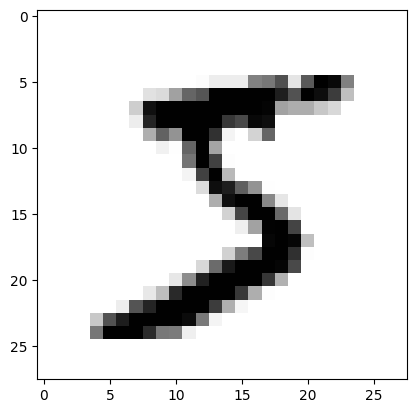

In [5]:
plt.imshow(img, cmap=plt.cm.binary)
plt.show()

In [6]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10)
])

In [7]:
train_images.shape

(60000, 28, 28)

In [8]:
train_images[:1].shape

(1, 28, 28)

In [9]:
predictions = model(train_images[:1]).numpy()
predictions

array([[-0.17594469, -0.46871185,  0.04048932,  0.4010744 ,  0.15436575,
         0.755646  , -0.03369167,  0.08245221,  0.03239721, -0.69103813]],
      dtype=float32)

In [10]:
p = tf.nn.softmax(predictions).numpy()
p

array([[0.07706949, 0.05750893, 0.09569266, 0.13723937, 0.10723449,
        0.1956443 , 0.08885098, 0.09979364, 0.09492142, 0.04604477]],
      dtype=float32)

In [11]:
p.sum()

1.0

In [12]:
p.argmax()

5

In [13]:
y_train[0]

5

In [14]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

In [15]:
loss_fn(y_train[:1], predictions).numpy()

1.6314571

In [16]:
model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])

In [17]:
model.fit(train_images, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2959 - accuracy: 0.9142
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1428 - accuracy: 0.9572
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1054 - accuracy: 0.9678
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0884 - accuracy: 0.9730
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0747 - accuracy: 0.9768
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0660 - accuracy: 0.9788
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0586 - accuracy: 0.9811
Epoch 8/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0532 - accuracy: 0.9831
Epoch 9/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0486 - accuracy: 0.9836
Epoch 10/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.046

In [18]:
model.evaluate(x_test, y_test, verbose=2)

313/313 - 0s - loss: 0.0711 - accuracy: 0.9802 - 388ms/epoch - 1ms/step


[0.07111972570419312, 0.9801999926567078]

In [19]:
probability_model = tf.keras.Sequential([
    model,
    tf.keras.layers.Softmax()
])

In [20]:
result = probability_model(x_test[:5])
result = result.numpy().argmax(axis=1)
print(y_test[:5])

[7 2 1 0 4]


In [21]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)